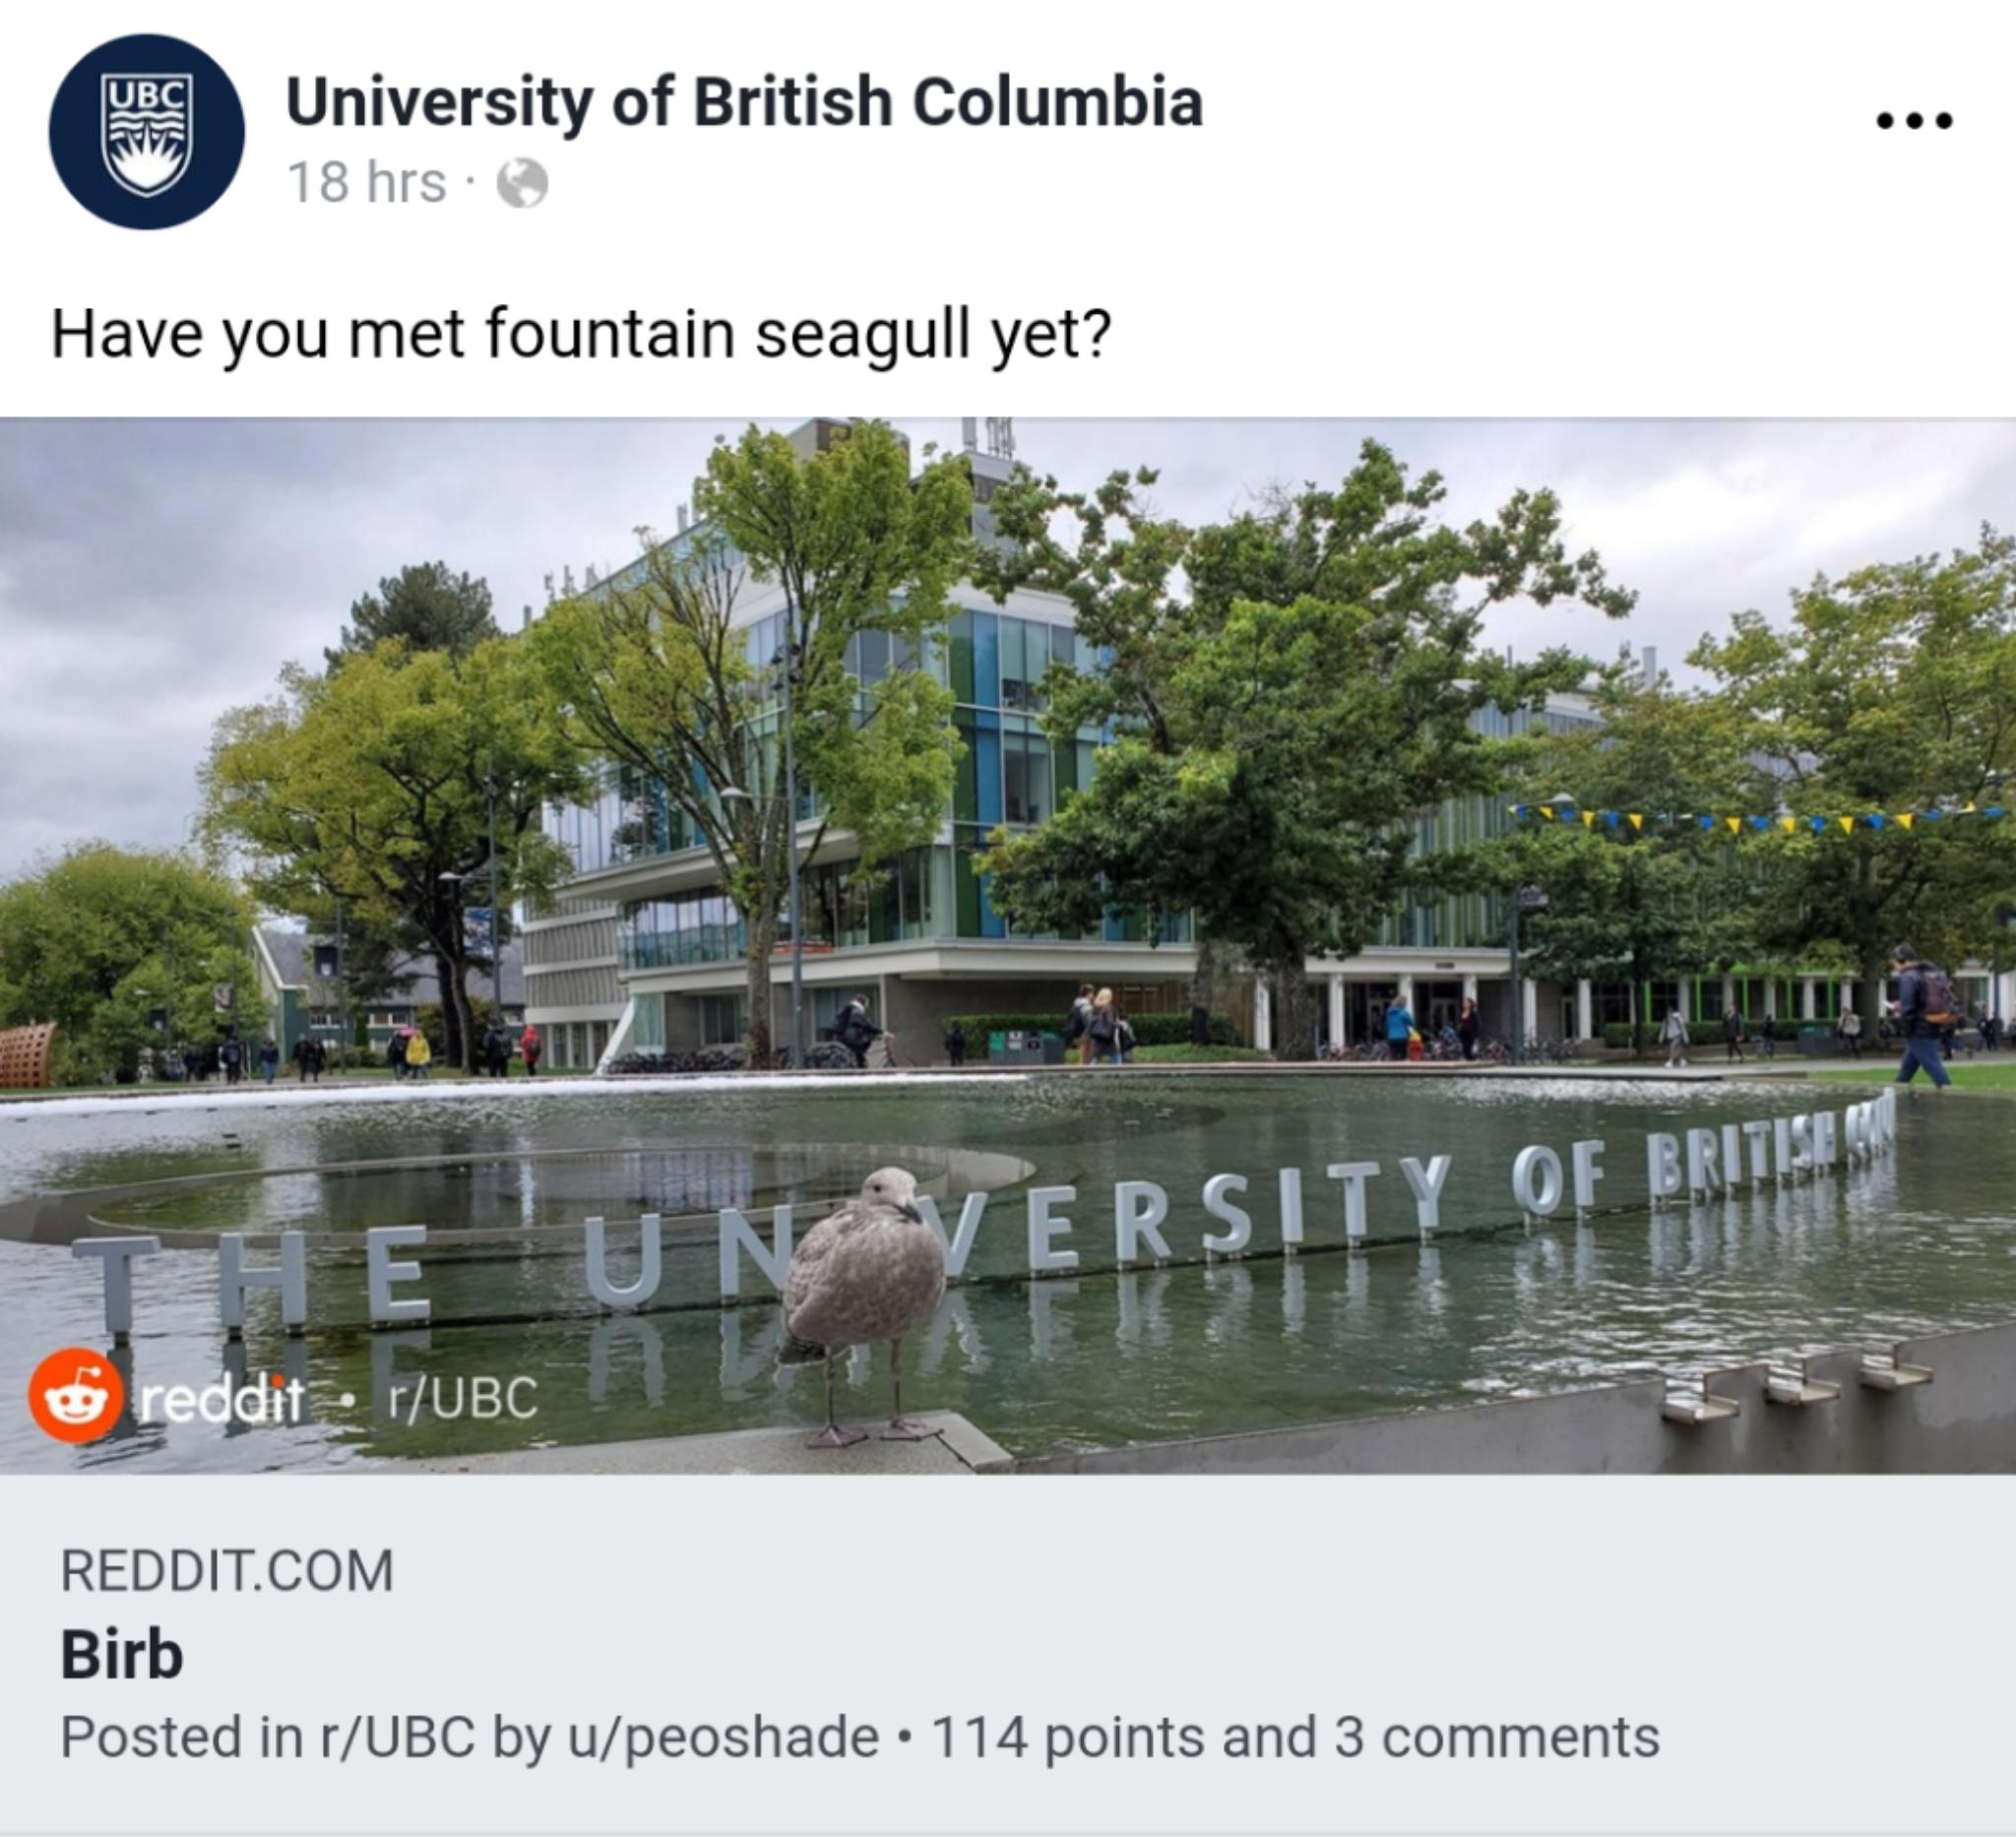

# Bird Watching

## You have recently become an avid bird-watcher and enjoy going to Pacific Spirit Park to see many different kinds of birds and/or posting pictures of them to reddit. To make sure that the birds you want to see will be in Pacific  Spirit Park, you'd like a way to represent your favourite birds and what their bird watching season is. Eventually you want a way to determine if you are within the bird watching season for any given bird, during a particular month you give as input.

## The chart below shows information about the bird wathcing seasons for your favourite birds. 

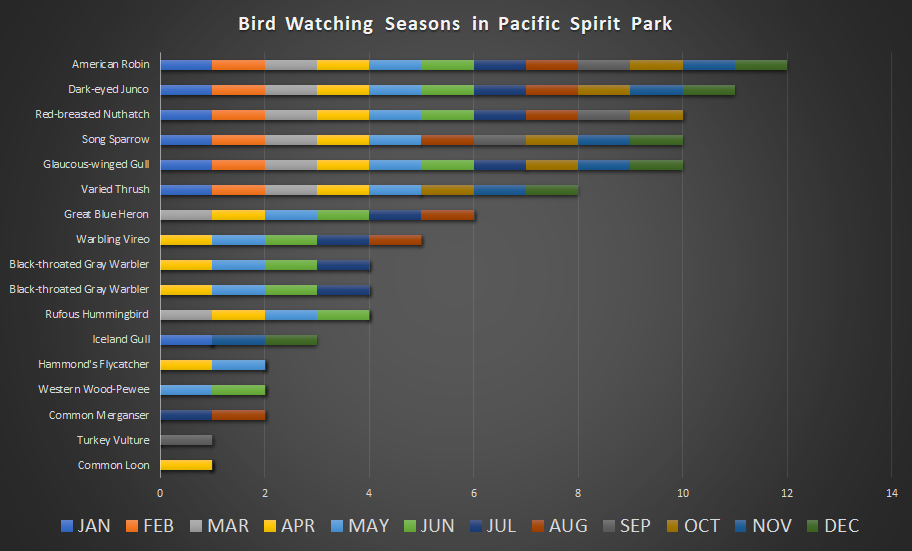

Data From: [ebird.org](https://ebird.org/home) 

[Create your own region specifc data from here](https://ebird.org/GuideMe?cmd=changeLocation) 

## Question 1
Design a data definition to represent different types of birds. Each one has a name and bird watching season. Assume that each bird watching season extends from a single start month to a single end month. Make sure to follow the HtDD recipe. 

You can use the chart above to know when a bird's bird-watching season is. For example, the Iceland Gull has a bird-watching season from November to January. 

In [1]:
from cs103 import *
from typing import NamedTuple


"""
COMMENTARY:

WE HAVE CHOSEN TO REPRESENT A BIRD AS NAME, THE FIRST MONTH YOU CAN SPOT IT, AND THE LAST MONTH YOU CAN SPOT IT. 
NOTE THAT A SEASON CAN GO AROUND THE YEAR. THE START MONTH IS NOT ALWAYS SMALLER THAN THE END MONTH. THIS IS THE SAME 
AS SAYING THAT EG: THE ICELAND GULL IS FIRST SEEN NOVEMBER, UPTO JANUARY OF THE NEXT YEAR. SO FIRST SEEN IN SAY NOVEMBER 
2019, UPTO JANUARY 2020. 

--- A SEASON NEEDS TO BE A RANGE OF *CONSECUTIVE* MONTHS. THAT IS TO SAY THERE ARE NO GAPS BETWEEN START_MONTH AND 
END_MONTH. SEASON CANNOT BE JANUARY, AND THEN NOVEMBER AND DECEMBER. IT MUST BE NOV TO JANUARY ----

THE EASIEST WAY TO REPRESENT A "SEASON" IS AS THE INTEGER REPRESENTATION OF THE START_MONTH AND END_MONTH. 
IT CAN BE ASSUMED THAT EVERYTHING IN BETWEEN THESE TWO MONTHS IS ALSO A MONTH IN SEASON FOR BIRDWATCHING SINCE WE 
WANT OUR SEASON TO EXCLUSIVELY BE CONSECUTIVE MONTHS.

"""


Bird = NamedTuple("Bird", [("name", str),
                           ("start_month", int), # in range[1, 12], Jan to Dec
                           ("end_month", int)])  # in range[1, 12], Jan to Dec
#interp. a Bird represents the name of the bird, the start month of its bird watching season 
#and the end month of the bird watching season for that bird

B1=Bird("American Robin",1,12)
B2=Bird("Dark-eyed Junco",10,8)         # --> note how the start_month > end_month here
B3=Bird("Song Sparrow",8,5)             # --> note how the start_month > end_month here
B4=Bird("Icelandic Gull",11,1)          # --> note how the start_month > end_month here
B5=Bird("Warbling Vireo",4,8)
B6=Bird("Turkey Vulture",3,3)
B7=Bird("Common Loon",4,4)
B8=Bird("Glaucious-winged Gull",10,7)   # --> note how the start_month > end_month here


def fn_for_bird(b: Bird) -> ...:
    # template from Compound with atomic non-distinct (3 times)
    return ...(b.name,
               b.season_start,
               b.season_end)

## Question 2
Design a function that takes a bird and an integer representing a month in the year and determines whether the given bird can be found in Pacific Spirit Park in that month. Make sure to follow the  HtDF recipe.

For example, since the Iceland Gull has a bird-watching season from November to January, it will be found in Pacific Spirit Park in December but will not be found in March.

<a href="https://imgflip.com/i/3d44gz"><img src="https://i.imgflip.com/3d44gz.jpg" title="made at imgflip.com"/></a>

## How to - In words

#### Inputs:
- `b` which is of type `Bird`
- `m` which is of type `int` 
    How do we know this? Because the questions states, " takes a bird and an integer representing a month" :)

We want to know if `m` is within b's bird watching season. This would mean is `m` "between" `season_start` and `season end`. First we want to notice how we define a "season". A season is a start month, and end month and everything in between the two is assumed to be in season. Like described above, our season is structured so that they are consecutive months. This would mean month `m`, must fall between start and end, if `m` is within the season. 

We want to determing if you could spot bird `b`, during month `m`, given what you know about b's season. 

Okay! So let's address that. From our examples written above we know we have different types of birds. Say we look at 2 arbitrary bird

1. **Case 1, BIRB_A**
    * __name:__ birbA
    * __start_month:__ 3
    * __end_month:__ 5
    * _The season extends from March to May_
    * __Includes:__ March, April, May
    * __Excludes:__ Jun, July, Aug, Sept, Oct, Nov, Dec,Jan, Feb


2. **Case 2, BIRB_B**
    * __name:__ birbB 
    * __start_month:__ 5
    * __end_month:__ 3
    * _The season extends from May to March_
    * __Includes:__ May,Jun, July, Aug, Sept, Oct, Nov, Dec,Jan, Feb, Mar
    * __Excludes:__ April
    

If we look at these 2 cases you will notice that the months excluded for `BirbA`, are included for `BirbB`, and vice-versa.But we want to write a function such that, `birb_function(BIRB_A,7)` returns False, _but_ `birb_function(BIRB_B,7)` returns True.

Therefore to accurately address all the different birds given in the image and the examples, we must evaluate by separating for these two cases. The key difference between Case 1 and 2, is that 1 has the `start_month < end_month` and Case 2 has `start_month > end_month`. 


1. **When start_month < end_month**
>This occurs when our season is within 1 year. So something like Jan to Dec or Feb to Jun. Since we know that m is between these months, we can tell that m is greater than or equal to the start_month **and** m is less than or equal to the end month. <br><br>
`m >= start_month and m <= end_month` <br><br>


2. **When start_month > end_month**
>This occurs when our season might extend into the following year. So something like Nov to Feb or Sep to Apr. Since we know that m is *still* between these months, we can tell that m is greater than or equal to the start_month **or** m is less than or equal to the end month.<br>
>Let's think about this. <br>
>If start_month = 5 <br>
>end_month = 3 <br><br>
>Then for `m` to be within this season `m` must be one of 5,6,7,8,9,10,11,12,1,2,3 <br>
>5,6,7,8,9,10,11,12 all being greater than or equal to the `start_month` **BUT** 1,2,3 being less than or equal to the `end_month`. Therefore `m` can only be one of the two, either greater than and equal to `start_month` **OR** less than and equal to the `end_month`; **but not both!** <br><br>
`m >= start_month or m <= end_month` 

    
Cool so is that all? *(Ha you thought...)*

### BUT WAIT THERE'S MORE 

![BrainDead](https://media.giphy.com/media/xUPGchIuMGVrjvVrDq/giphy.gif "brain dead")

What about this case:<br>
`B6=Bird("Turkey Vulture",3,3)`

What would we do when the start and end month are the same? Certainly we could replace our `>` or `<` to ask `>=` or `<=`. But which case should we change? If we say<br><br>
`if start_month >= end_month:
    return m >= start_month or m <= end_month`

So given `birb_function(B6,4) `it should return `False`. However:
* 4 is not <= end (end is 3)     --> evalates to False
* 4 is >= start (start is 3)     --> evalates to True
* `False or True` is True and so this would overall return `True`!

##### *(nuuuuuuuuuu...)* <br><br>
So we can fix this- how about asking if `start_month <= end_month`<br>
<br>So given `birb_function(B6,4)` which should return False,
* 4 is not <= end (end is 3)     --> evalates to False
* 4 is >= start (start is 3)     --> evalates to True
* `False and True` is False and so this would overall return `False`! <br>*** *happy dance* ***

So now we can see what the structure would look like overall<br>
`
if start_month <= end_month:
    return (m >= start_month) and (m <= end_month)
elif start_month > end_month:
    return (m >= start_month) or (m <= end_month)
`


EXCEPT - use the correct notation to indicate `b.start_month` and `b.end_month` :)

## Writing good tests

In this problem, what should we consider when making good tests and why? Consider the following test _types_

1. test for case when `start_month < end_month`, m is in range
2. test for case when `start_month < end_month`, m is not in range
3. test for case when `start_month < end_month`, m is either the `start_month` or `end_month`. Important because we want to make sure we are keeping the bounds inclusive.
4. test case when `start_month > end_month`, m is in range
5. test case when `start_month > end_month`, m is not in range
6. test for case when `start_month > end_month`, m is either the `start_month` or `end_month`. Important because we want to make sure we are keeping the bounds inclusive.
7. case when `start_month = end_month`, m is not in range. Important because that's how we check we are checking for equality in the correct place. In this case, that correct place is `b.start_month <= b.end_month` 

In [2]:
@typecheck
def can_birdwatch(b: Bird, m: int) -> bool:
    """
    returns True if bird b is within season for bird watching during month m, False otherwise.
    (assume m is an int in range[1, 12])
    """
    # return False  #stub
    # template from Bird with additional atomic parameter
    
    # case 1: Bird's start_month comes BEFORE its end_month
    #    e.g. Warbling Vireo: start_month=4, end_month=8 (Apr-Aug)
    #    e.g. American Robin: start_month=1, end_month=12 (Jan-Dec)
    if b.start_month <= b.end_month:
        return (m >= b.start_month) and (m <= b.end_month)
    
    # case 2: Bird's start_month comes AFTER its end_month
    #    e.g. Song Sparrow: start_month=8, end_month=5 (October-April)
    #    e.g. Icelandic Gull: start_month=11, end_month=1 (August-March)
    
    elif b.start_month > b.end_month:
        return (m >= b.start_month) or (m <= b.end_month)
    
    else:
        return False
    

start_testing()
expect(can_birdwatch(B1, 1), True)          #--> test types 1,3
expect(can_birdwatch(B5, 2), False)         #--> test type 2
expect(can_birdwatch(B2, 8), True)          #--> test types 4,6
expect(can_birdwatch(B2, 9), False)         #--> test type 5
expect(can_birdwatch(B6, 5), False)         #--> test type 7   
summary()

5 of 5 tests passed


# A succinct final function - for those that fancy short conditionals ;)

In [3]:
@typecheck
def can_birdwatch(b: Bird, m: int) -> bool:
    """
    returns True if bird, b is within season for bird watching during month m, False otherwise.
    (assume m is an int in range[1, 12])
    """
    # return False  # body of the stub
    # template from Bird with additional atomic parameter
    
    if b.start_month <= b.end_month:
        return b.start_month <= m and m <= b.end_month
    
    else: # otherwise, b.start_month must be greater than b.end_month
        return (m >= b.start_month) or (m <= b.end_month)
    
    
start_testing() 
expect(can_birdwatch(B1, 1), True)          #--> test types 1,3
expect(can_birdwatch(B5, 2), False)         #--> test types 2
expect(can_birdwatch(B2, 8), True)          #--> test types 4,6
expect(can_birdwatch(B2, 9), False)        #--> test types 5
expect(can_birdwatch(B6,5), False)         #--> test type 7         
summary()    

5 of 5 tests passed


![Tada!](https://media.giphy.com/media/d6ZTWNjgdmUrS/giphy.gif "tada")

